# Importación de paquetes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from math import cos,sin

# Recordando
La serie de Fourier definida en un intervalo $[-\pi,\pi]$ es:

$$f(x)=a_0+\sum_{n=1}^{+\infty}a_n\cdot \sin(nx)+\sum_{n=1}^{+\infty}b_n\cdot \cos(nx)$$

# Parametros:
- C: Ubicación de la fila en la imagen
- D: Ubicación de la columna en la imagen
- n: Parametro para definir el n de la sumatoria en la serie de Fourier

# <font color='red'>Aclaración</font>
La función toma el parametro **n** pero devuelve el grafico de la serie de Fourier de orden **n-1**.Es decir, ponemos $n=1$ devuelve la sumatoria $S_0$. 

In [2]:
def FOURIER_N(C,D,n):
    x=np.arange(-np.pi,np.pi,0.001)
    if n == 1:
        y=np.piecewise(x,[(x>=-np.pi) & (x<=0) , (x>0) & (x<np.pi/2),(x>=np.pi/2) & (x<np.pi) ],[0 , 1,0])
        a_0=quad(lambda x: np.piecewise(x,[(x>=-np.pi) & (x<=0) , (x>0) & (x<np.pi/2),(x>=np.pi/2)&(x<np.pi) ],[0 ,(1/np.pi)*1,0]),-np.pi,np.pi)[0]
        a[C][D].plot(x,a_0+0*x,'g',label="Serie Fourier")
        a[C][D].plot(x,y,'r--',label="$y(x)$")
        a[C][D].text(-2.4,0.8, f"n={str(n-1)}", style='italic',bbox={'facecolor': 'white', 'alpha': 15, 'pad': 10},fontsize=30)
    else :
        y=np.piecewise(x,[(x>=-np.pi) & (x<=0) , (x>0) & (x<np.pi/2),(x>=np.pi/2)&(x<np.pi) ],[0 , 1,0])
        fc=lambda x: np.piecewise(x,[(x>=-np.pi) & (x<=0) , (x>0) & (x<np.pi/2),(x>=np.pi/2)&(x<np.pi) ],[0 , 1,0])*cos(i*x)
        fs=lambda x: np.piecewise(x,[(x>=-np.pi) & (x<=0) , (x>0) & (x<np.pi/2),(x>=np.pi/2)&(x<np.pi) ],[0 , 1,0])*sin(i*x)
        An=[]
        Bn=[]
        sum=0
        for i in range(n):
            an=quad(fc,-np.pi,np.pi)[0]*(1.0/np.pi)
            An.append(an)
        for i in range(n):
            bn=quad(fs,-np.pi,np.pi)[0]*(1.0/np.pi)
            Bn.append(bn)
        for i in range(n):
            if i==0.0:
                sum=sum+An[i]/2
            else:
                sum=sum+(An[i]*np.cos(i*x)+Bn[i]*np.sin(i*x))
        a[C][D].plot(x,sum,'g',label="Serie Fourier")
        a[C][D].plot(x,y,'r--',label="$y(x)$")
        a[C][D].text(-2.4,0.8, f"n={str(n-1)}", style='italic',bbox={'facecolor': 'white', 'alpha': 15, 'pad': 10},fontsize=30)

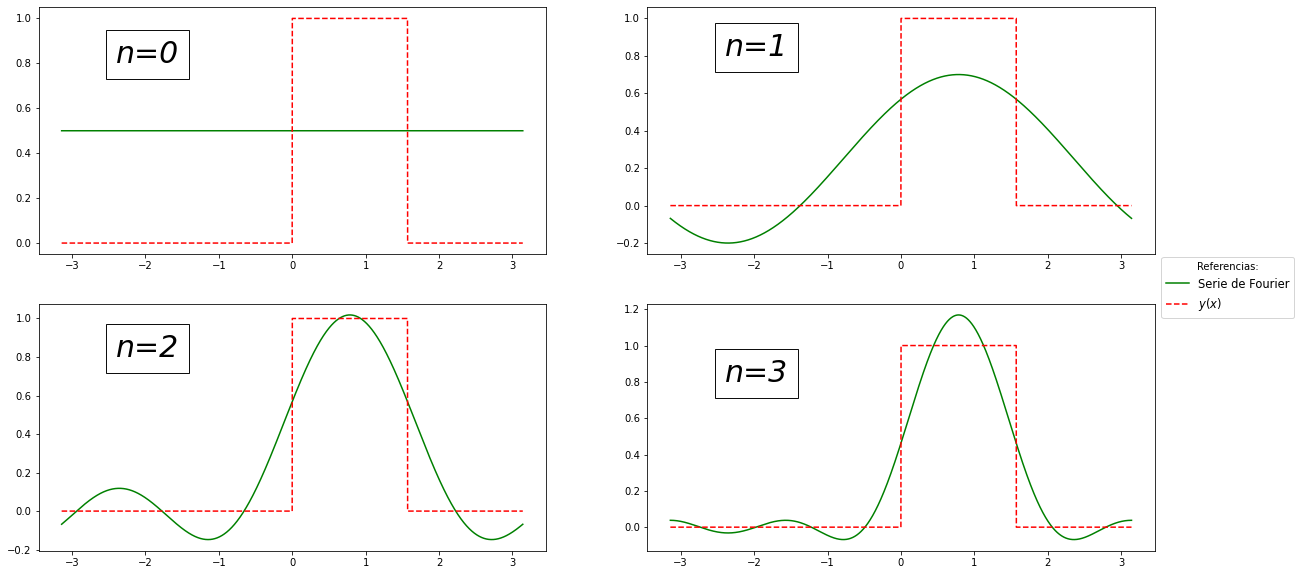

In [3]:
fig,a = plt.subplots(2,2,figsize=(20,10))

FOURIER_N(0,0,1)
FOURIER_N(0,1,2)
FOURIER_N(1,0,3)
FOURIER_N(1,1,4)

fig.legend(["Serie de Fourier","$y(x)$"],loc="center right",prop={"size":11.5},title="Referencias:",fontsize='xx-large')
plt.show()